# import

In [8]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
# from PIL import Image

# load stim resp

In [9]:
file_name = r'Z:\All_Staff\home\lan\Analysis\2P\220310_i1369\220310_i1369_runs-002\data_dfof.mat'.replace('\\', '/')
t = sio.loadmat(file_name)
print(t.keys())
data_dfof_max_gauss = t['data_dfof_max_gauss']
data_dfof_max_gauss.shape

dict_keys(['__header__', '__version__', '__globals__', 'data_dfof', 'data_dfof_max_gauss'])


(264, 796)

(262, 786)


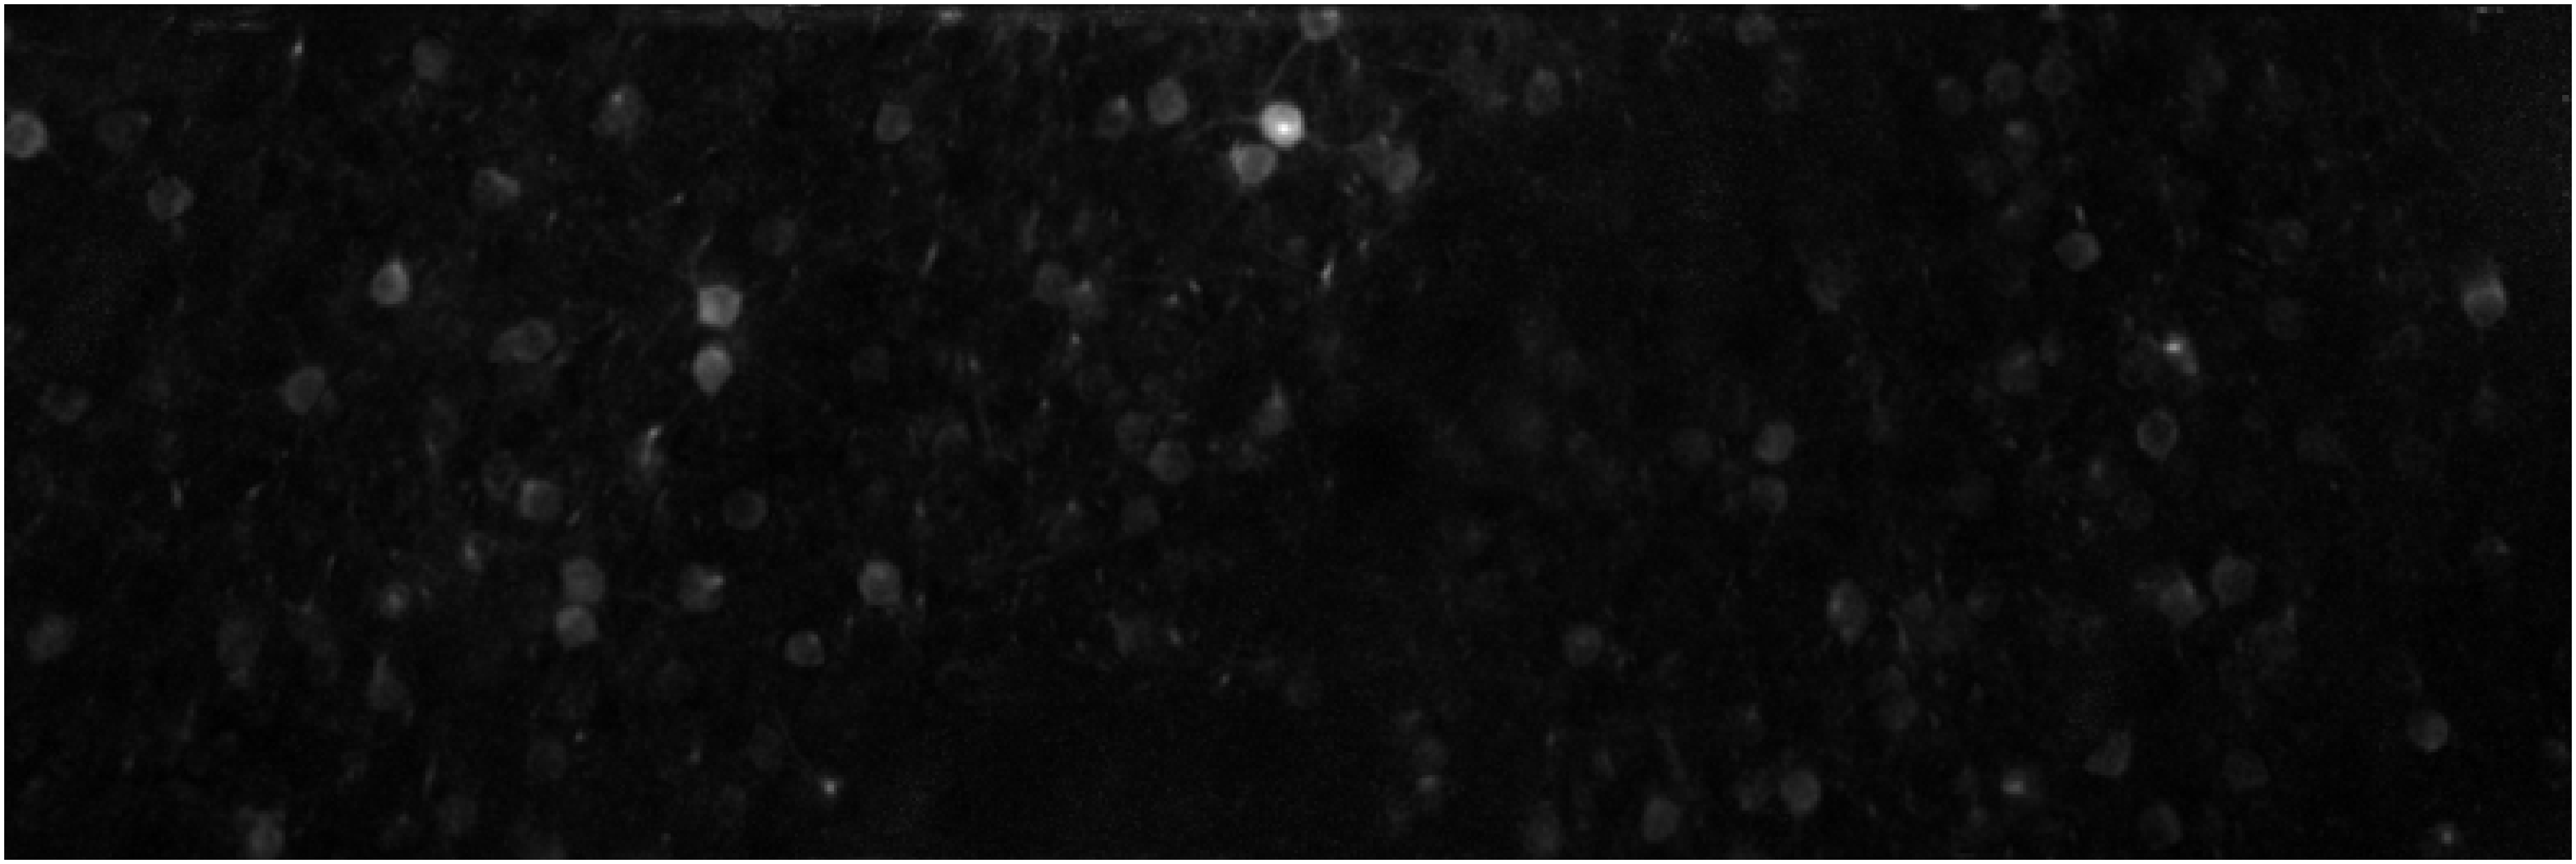

In [19]:
# max_proj = np.max(data_dfof, axis=2)
# percentile_95 = np.percentile(data_dfof, 95, axis=2)

edge_row = 1
edge_col = 5
data_no_edge = data_dfof_max_gauss[edge_row:-edge_row, edge_col:-edge_col]
print(data_no_edge.shape)

plt.figure(figsize=(78.6, 26.2))
plt.imshow(data_no_edge, cmap='gray')
plt.axis('off');
plt.savefig("dfof_max_gauss.png", bbox_inches='tight', pad_inches=0) # stim resp max, gauss filtering 

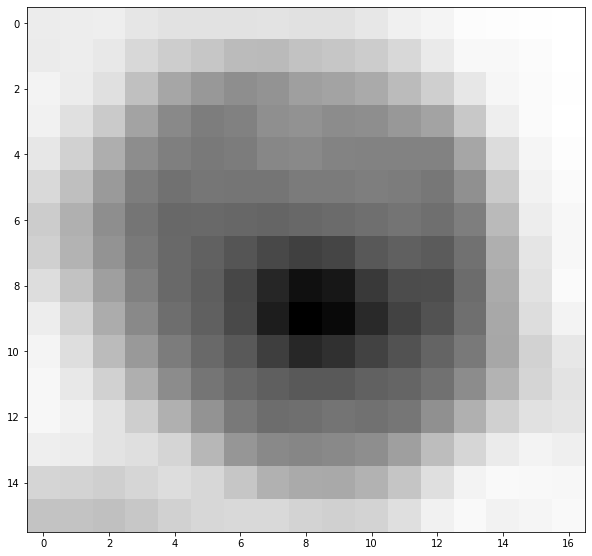

In [89]:
plt.figure(figsize=(10, 10))
plt.imshow(data_no_edge[29:45,383:400], cmap='binary') # cell diameter = 15 pixels

# load cellpose mask

In [41]:
# load npy from cellpose segmentation mask
tt = np.load('stim_resp_gauss_seg.npy', allow_pickle=True).item()
print(tt.keys())
cellpose_mask = tt['masks']
tt['masks'].shape

dict_keys(['outlines', 'colors', 'masks', 'chan_choose', 'img', 'ismanual', 'X2', 'filename', 'flows'])


(264, 796)

In [42]:
sio.savemat('cellpose_mask.mat', mdict={'cellpose_mask': cellpose_mask})

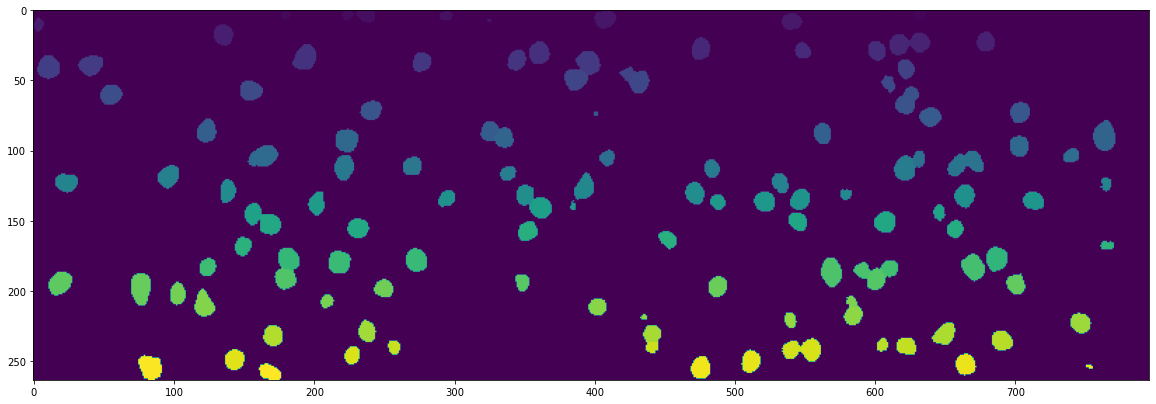

In [25]:
plt.figure(figsize=(20, 10))
plt.imshow(cellpose_mask)

# load manual mask

In [26]:
file_name = r'Z:\All_Staff\home\lan\Analysis\2P\220310_i1369\220310_i1369_runs-002\220310_i1369_runs-002_mask_cell_addfake.mat'.replace('\\', '/')
manual_mask = sio.loadmat(file_name)
print(manual_mask.keys())
manual_mask = manual_mask['mask_cell']
manual_mask.shape

dict_keys(['__header__', '__version__', '__globals__', 'data_dfof', 'mask_cell', 'mask_np'])


(264, 796)

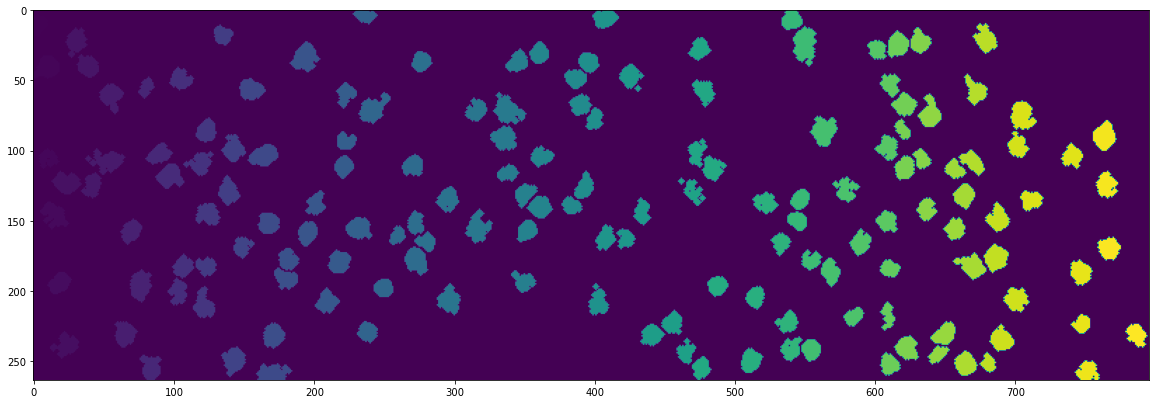

In [27]:
plt.figure(figsize=(20, 10))
plt.imshow(manual_mask)

# compare

In [38]:
cellpose_mask_binary = cellpose_mask.copy()
cellpose_mask_binary[cellpose_mask_binary > 0] = 1

manual_mask_binary = manual_mask.copy()
manual_mask_binary[manual_mask_binary > 0] = 1

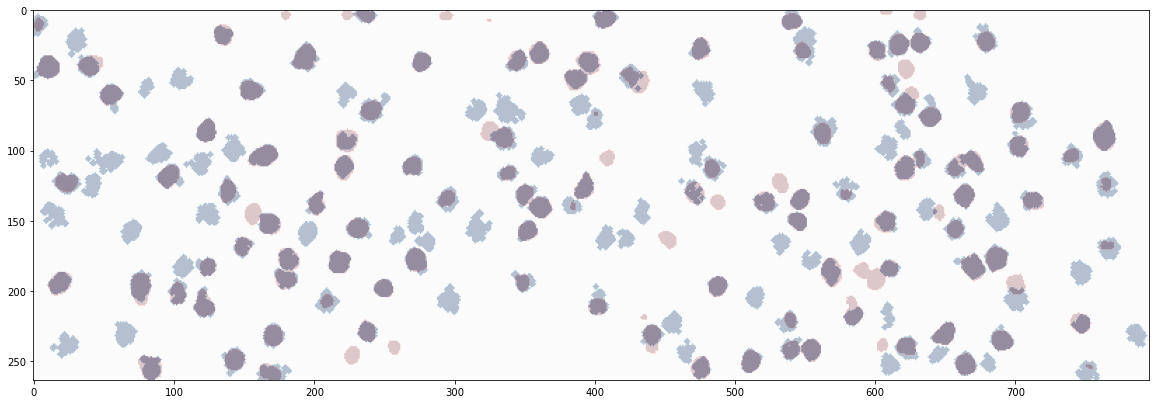

In [40]:
plt.figure(figsize=(20, 10))
plt.imshow(cellpose_mask_binary, cmap='Reds', alpha=0.3) # , aspect='equal'
plt.imshow(manual_mask_binary, cmap='Blues', alpha=0.3) #, interpolation='nearest', aspect='equal')
# plt.imshow(A, )


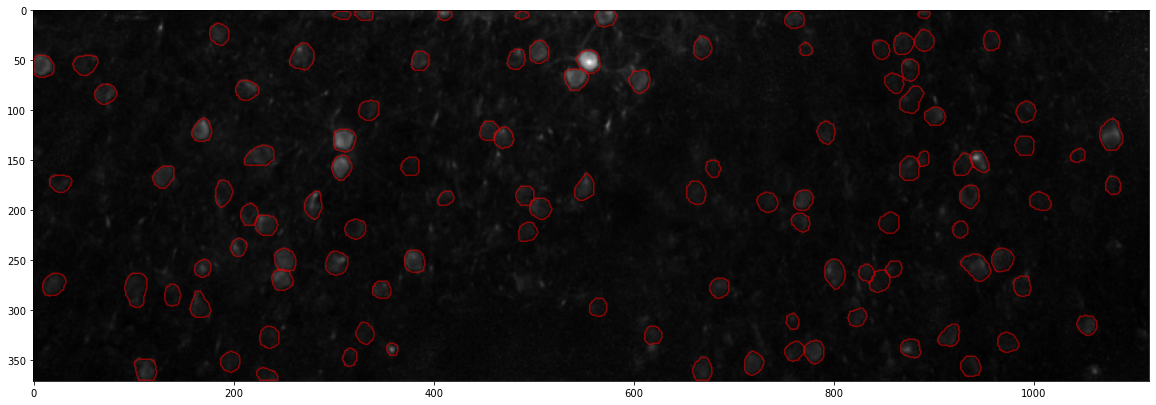

In [13]:
import numpy as np
from cellpose import plot, utils

dat = np.load('test_seg.npy', allow_pickle=True).item()

# plot image with masks overlaid
mask_RGB = plot.mask_overlay(dat['img'], dat['masks'],
                        colors=np.array(dat['colors']))

# plot image with outlines overlaid in red
outlines = utils.outlines_list(dat['masks'])

plt.figure(figsize=(20, 10))

plt.imshow(dat['img'], cmap='gray')
# plt.imshow(data_no_edge, cmap='gray')

for o in outlines:
    plt.plot(o[:,0], o[:,1], color='r', alpha=0.5)